In [30]:
# EX.1.1.8 d/e

from math import log2
from math import ceil
# d
a = -3
b = 16
tol = 10 ** -3
k = ceil(log2(b - a) - log2(tol) - 1)
print(k + 1)

# e
a = -0.2
b = 2.7
tol = 10 ** -12
k = ceil(log2(b - a) - log2(tol) - 1)
print(k + 1)

15
42


In [31]:
# EX.1.1.2(function/imports)
import math
import scipy.optimize
import numpy as np

def bisect( f, a, b, tol, verbose ):

  numeval = 0

  err_bound = []

  k = 0

  fa = f(a)
  numeval += 1

  if ( fa == 0 ): # `a` is a solution, done
    if ( verbose ): print( 'f(a) = 0, returning `a` as a solution ' )
    return a, 0., numeval

  fb = f(b)
  numeval += 1

  if ( fb == 0 ): # `b` is a solution, done
    if ( verbose ): print( 'f(b) = 0, returning `b` as a solution ' )
    return b, 0., numeval

  if ( ( fa > 0 ) and ( fb > 0 ) ) or ( ( fa < 0 ) and ( fb < 0 ) ):
    print( '[ error ] f(a) and f(b) have the same sign' )
    return float("NaN"), numeval, float("NaN")

  if ( ( b - a ) / 2 <=  tol ):
    c = ( a + b ) / 2
    err_bound.append( ( b - a ) / 2 )
    if ( verbose ): print( '( b - a ) / 2 <=  tol, f(a) and f(b) opposite signs' )
    if ( verbose ): print( 'returning c = ( b + a ) / 2 as an approximate solution' )
    return c, numeval, err_bound

  while ( ( b - a ) / 2 > tol ):

    c = ( a + b ) / 2

    err_bound.append( ( b - a ) / 2 )

    if ( verbose ): print( f"{k:3d}", f"{c:20.16f}", '  ', f"{err_bound[k]:3.1e}" )

    k = k + 1

    fc = f(c)
    numeval += 1

    if ( fc == 0 ): # `c` is a solution, done
      return c, 0., numeval

    if ( ( fb > 0 ) and ( fc > 0 ) ) or ( ( fb < 0 ) and ( fc < 0 ) ):
#     `a` and `c` make the new interval
#     so replace `b` with `c`
      b = c
      fb = fc

    else:
#     `c` and `b` make the new interval
#     so replace `a` with `c`
      a = c
      fa = fc

    c = ( a + b ) / 2

  err_bound.append( (b - a ) / 2 )

  if ( verbose ): print( f"{k:3d}", f"{c:20.16f}", '  ', f"{err_bound[k]:3.1e}" )

  return c, err_bound, numeval


In [32]:
# EX.1.1.2(solutions)

a = lambda x : x ** 5 + x - 1
x_bisec, err_bound, numeval = bisect( a, 0., 1., 1e-8, False )
print( x_bisec, err_bound[-1], numeval )
x_fsolve = scipy.optimize.fsolve( a, 1. )[0]
print( x_fsolve )

# not sure why this was only to 7 decimal places
b1 = lambda x : math.sin(x) - 6 * x + 5
x_bisec, err_bound, numeval = bisect( b1, 0., 1., 1e-8, False )
print( x_bisec, err_bound[-1], numeval )
x_fsolve = scipy.optimize.fsolve( b1, 1. )[0]
print( x_fsolve )

c = lambda x : math.log(x) + x ** 2 - 3
x_bisec, err_bound, numeval = bisect( c, 1., 2., 1e-8, False )
print( x_bisec, err_bound[-1], numeval )
x_fsolve = scipy.optimize.fsolve( c, 1. )[0]
print( x_fsolve )

# b part 2
b2 = lambda x : math.sin(x) - 6 * x + 5
x_bisec, err_bound, numeval = bisect( b2, 0., 1., 1e-9, False )
print( x_bisec, err_bound[-1], numeval )
x_fsolve = scipy.optimize.fsolve( b2, 1. )[0]
print( x_fsolve )


0.7548776641488075 7.450580596923828e-09 28
0.7548776662466931
0.9708989188075066 7.450580596923828e-09 28
0.9708989235042559
1.5921429321169853 7.450580596923828e-09 28
1.592142937058094
0.9708989234641194 9.313225746154785e-10 31
0.9708989235042559


<ipython-input-32-2acbc11b1b22>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1 = lambda x : math.sin(x) - 6 * x + 5
<ipython-input-32-2acbc11b1b22>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c = lambda x : math.log(x) + x ** 2 - 3
<ipython-input-32-2acbc11b1b22>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b2 = lambda x : math.sin(x) - 6 * x + 5


In [33]:
# CP.1.2.4
# INITIAL GUESS is 2

def g(x, A):
    return (2 * x + A / (x ** 2)) / 3

# a (6 iterations)
A = 2.
x = 2.

r = A ** (1 / 3)

true_fwd_rel_error = abs(r - x) / abs(r)
print(f"{0:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")

for i in range(10):
    x = g(x, A)
    true_fwd_rel_error = abs(r - x) / abs(r)
    print(f"{i+1:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")



# b (5 iterations)
A = 3.
x = 2.

r = A ** (1 / 3)

true_fwd_rel_error = abs(r - x) / abs(r)
print(f"{0:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")

for i in range(10):
    x = g(x, A)
    true_fwd_rel_error = abs(r - x) / abs(r)
    print(f"{i+1:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")

# c (5 iterations)
A = 5.
x = 2.

r = A ** (1 / 3)

true_fwd_rel_error = abs(r - x) / abs(r)
print(f"{0:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")

for i in range(10):
    x = g(x, A)
    true_fwd_rel_error = abs(r - x) / abs(r)
    print(f"{i+1:2d}", f"{x:.15f}", f"{true_fwd_rel_error:.2e}")


 0 2.000000000000000 5.87e-01
 1 1.500000000000000 1.91e-01
 2 1.296296296296296 2.89e-02
 3 1.260932224741748 8.03e-04
 4 1.259921860565926 6.43e-07
 5 1.259921049895395 4.14e-13
 6 1.259921049894873 0.00e+00
 7 1.259921049894873 0.00e+00
 8 1.259921049894873 0.00e+00
 9 1.259921049894873 0.00e+00
10 1.259921049894873 0.00e+00
 0 2.000000000000000 3.87e-01
 1 1.583333333333333 9.78e-02
 2 1.454447522314559 8.46e-03
 3 1.442351584357819 7.07e-05
 4 1.442249577522446 5.00e-09
 5 1.442249570307409 1.54e-16
 6 1.442249570307409 1.54e-16
 7 1.442249570307409 1.54e-16
 8 1.442249570307409 1.54e-16
 9 1.442249570307409 1.54e-16
10 1.442249570307409 1.54e-16
 0 2.000000000000000 1.70e-01
 1 1.750000000000000 2.34e-02
 2 1.710884353741497 5.31e-04
 3 1.709976428916975 2.82e-07
 4 1.709975946676833 7.96e-14
 5 1.709975946676697 1.30e-16
 6 1.709975946676697 1.30e-16
 7 1.709975946676697 1.30e-16
 8 1.709975946676697 1.30e-16
 9 1.709975946676697 1.30e-16
10 1.709975946676697 1.30e-16


In [34]:
# CP.1.3.2 part b

import numpy as np
from scipy.optimize import fsolve

guess = 0.1
f = lambda x: np.sin(x ** 3) - x ** 3
root = fsolve(f, guess)[0]

print("Forward error:", np.abs(root))

back_err = np.abs(f(root))
print("Backward error:", back_err)


Forward error: 0.0026072710744116804
Backward error: 0.0


In [35]:
# CP.1.4.2
# a
from math import sin, cos, log
def newton_method( f, dfdx, x, numiter, r ):
  for i in range(0,numiter):
    x = x - f(x) / dfdx(x)
    true_fwd_rel_error = abs( r - x ) / abs( r )
    print( f"{i+1:2d}", f"{x:.16f}", f"{true_fwd_rel_error:.2e}" )
  return x

# a
f = lambda x: x ** 5 + x - 1
dfdx = lambda x: 5 * x ** 4 + 1
x = 1
numiter = 5
r = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{r:.16f}" )
x = newton_method( f, dfdx, x, numiter, r )
newton_method( f, dfdx, x, numiter, r )

# b
f = lambda x: sin(x) - 6 * x + 5
dfdx = lambda x: cos(x) - 6
x = 1
numiter = 5
r = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{r:.16f}" )
x = newton_method( f, dfdx, x, numiter, r )
newton_method( f, dfdx, x, numiter, r )

# c
f = lambda x: log(x) + x ** 2 - 3
dfdx = lambda x: 1 / x + 2 * x
x = 1
numiter = 5
r = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{r:.16f}" )
x = newton_method( f, dfdx, x, numiter, r )
newton_method( f, dfdx, x, numiter, r )

   0.7548776662466931
 1 0.8333333333333334 1.04e-01
 2 0.7643821156601071 1.26e-02
 3 0.7550248672318378 1.95e-04
 4 0.7548777017701278 4.71e-08
 5 0.7548776662466948 2.35e-15
 1 0.7548776662466928 2.94e-16
 2 0.7548776662466927 4.41e-16
 3 0.7548776662466927 4.41e-16
 4 0.7548776662466927 4.41e-16
 5 0.7548776662466927 4.41e-16
   0.9708989235042559
 1 0.9709637741733408 6.68e-05
 2 0.9708989238235813 3.29e-10
 3 0.9708989235042558 1.14e-16
 4 0.9708989235042558 1.14e-16
 5 0.9708989235042558 1.14e-16
 1 0.9708989235042558 1.14e-16
 2 0.9708989235042558 1.14e-16
 3 0.9708989235042558 1.14e-16
 4 0.9708989235042558 1.14e-16
 5 0.9708989235042558 1.14e-16
   1.5921429370580940
 1 1.6666666666666665 4.68e-02
 2 1.5932929205114714 7.22e-04
 3 1.5921432154544350 1.75e-07
 4 1.5921429370581102 1.02e-14
 5 1.5921429370580940 0.00e+00
 1 1.5921429370580937 1.39e-16
 2 1.5921429370580940 0.00e+00
 3 1.5921429370580937 1.39e-16
 4 1.5921429370580940 0.00e+00
 5 1.5921429370580937 1.39e-16


<ipython-input-35-4d9d20986afe>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x: sin(x) - 6 * x + 5
<ipython-input-35-4d9d20986afe>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x: log(x) + x ** 2 - 3


1.5921429370580937

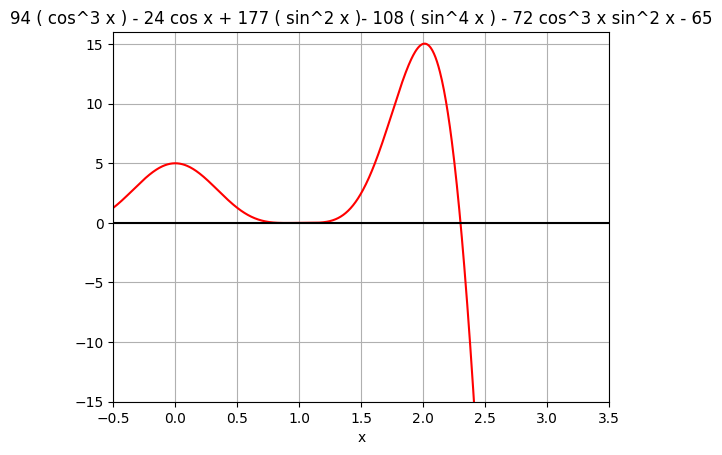

0.8410686705679682
 0 0.7500000000000000 1.08e-01 8.14e-02
 2 0.7212637817386515 1.42e-01 1.36e-01
 3 0.6731802258740707 2.00e-01 2.69e-01
 4 0.5782143287731213 3.13e-01 7.11e-01
 5 0.3319847053223967 6.05e-01 2.86e+00
 6 -0.4456013678555685 1.53e+00 1.73e+00
 7 0.1075222046578456 8.72e-01 4.73e+00
1.0472078209027842
 0 1.1250000000000000 7.43e-02 6.07e-03
 2 1.1230667876727518 7.24e-02 5.59e-03
 3 1.1212859091531395 7.07e-02 5.17e-03
 4 1.1196376418826501 6.92e-02 4.80e-03
 5 1.1181057294247667 6.77e-02 4.47e-03
 6 1.1166766264242036 6.63e-02 4.19e-03
 7 1.1153389369671154 6.51e-02 3.93e-03
 8 1.1140829900439728 6.39e-02 3.70e-03
 9 1.1129005140048980 6.27e-02 3.49e-03
10 1.1117843836760399 6.17e-02 3.30e-03
11 1.1107284216062105 6.07e-02 3.13e-03
12 1.1097272401848159 5.97e-02 2.97e-03
13 1.1087761150000852 5.88e-02 2.82e-03
14 1.1078708823450110 5.79e-02 2.69e-03
15 1.1070078555818472 5.71e-02 2.57e-03
16 1.1061837563747277 5.63e-02 2.46e-03
17 1.1053956577478623 5.56e-02 2.35e-03
1

<ipython-input-36-b483bd2e42f1>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : 94. * ( ( cos( x ) ) ** 3 ) \
<ipython-input-36-b483bd2e42f1>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  - 24. * ( cos( x ) ) \
<ipython-input-36-b483bd2e42f1>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  + 177. * ( ( sin( x ) ) ** 2 ) \
<ipython-input-36-b483bd2e42f1>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, an

In [36]:
# CP.1.4.8
from math import exp
from math import sin
from math import cos
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# roots 1 and 3 are quadratic while root 2 converges very slowly, not quadratic, and would seem linear

f = lambda x : 94. * ( ( cos( x ) ) ** 3 ) \
               - 24. * ( cos( x ) ) \
               + 177. * ( ( sin( x ) ) ** 2 ) \
               - 108. * ( ( sin( x ) ) ** 4 ) \
               - 72. * ( ( cos( x ) ) ** 3 ) * ( ( sin( x ) ) ** 2 ) \
               - 65.

fnp = lambda x : 94. * ( ( np.cos( x ) ) ** 3 ) \
               - 24. * ( np.cos( x ) ) \
               + 177. * ( ( np.sin( x ) ) ** 2 ) \
               - 108. * ( ( np.sin( x ) ) ** 4 ) \
               - 72. * ( ( np.cos( x ) ) ** 3 ) * ( ( np.sin( x ) ) ** 2 ) \
               - 65.
xx = np.linspace( -0.5, 3.5, 1000)
yy = fnp(xx)
plt.plot(xx, yy, '-r', label='forward error bound');
xx = np.linspace( -0.5, 3.5, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k', label='forward error bound');
plt.title('94 ( cos^3 x ) - 24 cos x + 177 ( sin^2 x )'+\
          '- 108 ( sin^4 x ) - 72 cos^3 x sin^2 x - 65')
plt.xlabel('x')
plt.xlim([ -0.5, 3.5])
plt.ylim([-15., 16.])
plt.grid()
plt.show()

root1 = scipy.optimize.fsolve( f, 0.75 )[0]
root2 = scipy.optimize.fsolve( f, 1.25 )[0]
root3 = scipy.optimize.fsolve( f, 2.5 )[0]


x = 0.75
r = root1
print(r)
fwd_rel_error = abs( r - x ) / abs( r )
bwd_error = abs(f(x))
print( f"{0:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )
for i in range(1,7):
  x = x - f(x) / dfdx(x)
  fwd_rel_error = abs( r - x ) / abs( r )
  bwd_error = abs(f(x))
  print( f"{i+1:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )

x = 1.125
r = root2
print(r)
fwd_rel_error = abs( r - x ) / abs( r )
bwd_error = abs(f(x))
print( f"{0:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )
for i in range(1,30):
  x = x - f(x) / dfdx(x)
  fwd_rel_error = abs( r - x ) / abs( r )
  bwd_error = abs(f(x))
  print( f"{i+1:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )

x = 2.5
r = root3
print(r)
fwd_rel_error = abs( r - x ) / abs( r )
bwd_error = abs(f(x))
print( f"{0:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )
for i in range(1,5):
  x = x - f(x) / dfdx(x)
  fwd_rel_error = abs( r - x ) / abs( r )
  bwd_error = abs(f(x))
  print( f"{i+1:2d}", f"{x:.16f}", f"{fwd_rel_error:.2e}", f"{bwd_error:.2e}" )

x_sym = sp.symbols('x')
cos_x_sym = sp.cos(x_sym)
sin_x_sym = sp.sin(x_sym)

fa_sp = 94. * (cos_x_sym**3) \
        - 24. * cos_x_sym \
        + 177. * (sin_x_sym**2) \
        - 108. * (sin_x_sym**4) \
        - 72. * (cos_x_sym**3) * (sin_x_sym**2) \
        - 65.


dfdx_sp = sp.diff(fa_sp, x_sym)
dfdfdxdx_sp = sp.diff(dfdx_sp, x_sym)

f = sp.lambdify(x_sym, fa_sp, 'numpy')
dfdx = sp.lambdify(x_sym, dfdx_sp, 'numpy')
d2fdx2 = sp.lambdify(x_sym, dfdfdxdx_sp, 'numpy')

print(f(root1))
print(dfdx(root1))
print(d2fdx2(root1))
print(f(root2))
print(dfdx(root2))
print(d2fdx2(root2))
print(f(root3))
print(dfdx(root3))
print(d2fdx2(root3))

In [37]:
# CP.1.5.1

import scipy.optimize

def secant_method( f, x0, x1, numiter, r ):

  true_fwd_rel_error = abs( r - x0 ) / abs( r )
  print( f"{0:2d}", f"{x0:.16f}", f"{true_fwd_rel_error:.2e}" )

  true_fwd_rel_error = abs( r - x1 ) / abs( r )
  print( f"{1:2d}", f"{x1:.16f}", f"{true_fwd_rel_error:.2e}" )

  fx0 = f( x0 )
  for i in range(1,numiter):
    fx1 = f( x1 )
    x = x1 - fx1 * ( x1 - x0 ) / ( fx1 - fx0 )
    true_fwd_rel_error = abs( r - x ) / abs( r )
    print( f"{i+1:2d}", f"{x:.16f}", f"{true_fwd_rel_error:.2e}" )
    x0 = x1
    fx0 = fx1
    x1 = x
  return x

# a
f = lambda x : ( x ** 3 ) - ( 2 * x ) - 2
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

x0 = 1
x1 = 2
secant_method( f, x0, x1, 8, x_fsolve )

# b
f = lambda x : ( math.exp(x) ) + x - 7
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

x0 = 1
x1 = 2
secant_method( f, x0, x1, 8, x_fsolve )

# c
f = lambda x : ( math.exp (x) ) + sin(x) - 4
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

x0 = 1
x1 = 2
secant_method( f, x0, x1, 8, x_fsolve )

   1.7692923542386312
 0 1.0000000000000000 4.35e-01
 1 2.0000000000000000 1.30e-01
 2 1.6000000000000001 9.57e-02
 3 1.7422680412371134 1.53e-02
 4 1.7729559878279366 2.07e-03
 5 1.7692203651195755 4.07e-05
 6 1.7692921651959501 1.07e-07
 7 1.7692923542484049 5.52e-12
 8 1.7692923542386314 1.25e-16
   1.6728216986289064
 0 1.0000000000000000 4.02e-01
 1 2.0000000000000000 1.96e-01
 2 1.5787072479025044 5.63e-02
 3 1.6601600999426993 7.57e-03
 4 1.6733279622124804 3.03e-04
 5 1.6728189972632956 1.61e-06
 6 1.6728216980532040 3.44e-10
 7 1.6728216986289073 5.31e-16
 8 1.6728216986289064 0.00e+00
   1.1299804986508324
 0 1.0000000000000000 1.15e-01
 1 2.0000000000000000 7.70e-01
 2 1.0929065801160904 3.28e-02
 3 1.1193566855644101 9.40e-03
 4 1.1301024531032799 1.08e-04
 5 1.1299800960524500 3.56e-07
 6 1.1299804986355602 1.35e-11
 7 1.1299804986508324 0.00e+00
 8 1.1299804986508324 0.00e+00


<ipython-input-37-d84c5a1c2a2d>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp(x) ) + x - 7
<ipython-input-37-d84c5a1c2a2d>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp (x) ) + sin(x) - 4


1.1299804986508324

In [38]:
# CP.1.5.2

def method_of_false_position( f, a, b, numiter, r ):

  fa = f(a)
  fb = f(b)

  for i in range(0,numiter):
    c = ( b*f(a) - a*fb ) / ( fa - fb )
    true_fwd_rel_error = abs( r - c ) / abs( r )
    print( f"{i+1:2d}", f"{c:.16f}", f"{true_fwd_rel_error:.2e}" )
    fc = f(c)
    if ( ( fb > 0 ) and ( fc > 0 ) ) or ( ( fb < 0 ) and ( fc < 0 ) ):
      b = c
      fb = fc
    else:
      a = c
      fa = fc

  return c

# a
f = lambda x : ( x ** 3 ) - ( 2 * x ) - 2

x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

a = 1
b = 2

x = method_of_false_position( f, a, b, 19, x_fsolve )

# b
f = lambda x : ( math.exp(x) ) + x - 7

x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

a = 1
b = 2

x = method_of_false_position( f, a, b, 19, x_fsolve )

# c
f = lambda x : ( math.exp (x) ) + sin(x) - 4

x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "  ", f"{x_fsolve:.16f}" )

a = 1
b = 2

x = method_of_false_position( f, a, b, 19, x_fsolve )

   1.7692923542386312
 1 1.6000000000000001 9.57e-02
 2 1.7422680412371134 1.53e-02
 3 1.7652591529969437 2.28e-03
 4 1.7686967661242612 3.37e-04
 5 1.7692045415304856 4.96e-05
 6 1.7692794102646114 7.32e-06
 7 1.7692904463061978 1.08e-06
 8 1.7692920730121895 1.59e-07
 9 1.7692923127862974 2.34e-08
10 1.7692923481286233 3.45e-09
11 1.7692923533380260 5.09e-10
12 1.7692923541058836 7.50e-11
13 1.7692923542190646 1.11e-11
14 1.7692923542357473 1.63e-12
15 1.7692923542382064 2.40e-13
16 1.7692923542385688 3.53e-14
17 1.7692923542386221 5.15e-15
18 1.7692923542386301 6.27e-16
19 1.7692923542386312 0.00e+00
   1.6728216986289064
 1 1.5787072479025042 5.63e-02
 2 1.6601600999426993 7.57e-03
 3 1.6711295739211935 1.01e-03
 4 1.6725957667131959 1.35e-04
 5 1.6727915359888301 1.80e-05
 6 1.6728176718852903 2.41e-06
 7 1.6728211610556529 3.21e-07
 8 1.6728216268625002 4.29e-08
 9 1.6728216890480414 5.73e-09
10 1.6728216973498544 7.65e-10
11 1.6728216984581523 1.02e-10
12 1.6728216986061106 1.36

<ipython-input-38-fb7e4bb1c4d9>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp(x) ) + x - 7
<ipython-input-38-fb7e4bb1c4d9>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp (x) ) + sin(x) - 4


In [39]:
# CP.1.5.3

def inverse_quadratic_interpolation( f, a, b, c, numiter, rr ):

  fa = f(a)
  fb = f(b)

  for i in range(0,numiter):

    fc = f(c)

    if(fb != 0 and fa != 0):
      q = fa / fb
      r = fc / fb
      s = fc / fa

    if (( ( q - 1. ) * ( r - 1. ) * ( s - 1. ) ) != 0):

      x = c - ( r * ( r - q ) * ( c - b ) + ( 1 - r ) * s * ( c - a ) ) / ( ( q - 1. ) * ( r - 1. ) * ( s - 1. ) )

    true_fwd_rel_error = abs( rr - x ) / abs( rr )

    print( f"{i+1:2d}", f"{x:20.16f}", f"{true_fwd_rel_error:.2e}" )

    a = b
    fa = fb
    b = c
    fb = fc
    c = x

  return c

# a
f = lambda x : ( x ** 3 ) - ( 2 * x ) - 2
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "    ", f"{x_fsolve:.16f}" )

x0 = 1.
x1 = 2.
x2 = 0.

x = inverse_quadratic_interpolation( f, x0, x1, x2, 30, x_fsolve )

# b
f = lambda x : ( math.exp(x) ) + x - 7
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "    ", f"{x_fsolve:.16f}" )

x0 = 1.
x1 = 2.
x2 = 0.

x = inverse_quadratic_interpolation( f, x0, x1, x2, 30, x_fsolve )

# c
f = lambda x : ( math.exp (x) ) + sin(x) - 4
x_fsolve = scipy.optimize.fsolve( f, 1. )[0]
print( "    ", f"{x_fsolve:.16f}" )

x0 = 1.
x1 = 2.
x2 = 0.

x = inverse_quadratic_interpolation( f, x0, x1, x2, 30, x_fsolve )

     1.7692923542386312
 1  -0.1999999999999999 1.11e+00
 2  -0.1199601791936286 1.07e+00
 3  -1.1580007692962857 1.65e+00
 4 -12.1572812689860648 7.87e+00
 5  -3.6060885264071736 3.04e+00
 6  -1.0815185380159669 1.61e+00
 7  -1.0114756479243805 1.57e+00
 8  -0.2054604336859334 1.12e+00
 9   4.6173853301665471 1.61e+00
10  -2.3773358058814331 2.34e+00
11   0.1443423726971904 9.18e-01
12   0.7684099325505713 5.66e-01
13  -2.6488004643753440 2.50e+00
14  -2.2203900137243293 2.25e+00
15   3.5162429881210411 9.87e-01
16  -1.4989195775596222 1.85e+00
17  -1.2115191418246734 1.68e+00
18  -0.8408532975333224 1.48e+00
19   0.3948053928968701 7.77e-01
20   1.2922600455490416 2.70e-01
21  -7.4781168764359132 5.23e+00
22   8.5626911950999443 3.84e+00
23   1.3355149284442147 2.45e-01
24   1.3763933267903865 2.22e-01
25   1.9843023938814492 1.22e-01
26   1.8296484574881002 3.41e-02
27   1.7641930239436967 2.88e-03
28   1.7692440805120235 2.73e-05
29   1.7692923669817904 7.20e-09
30   1.769292354238

<ipython-input-39-24453f34b541>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp(x) ) + x - 7
<ipython-input-39-24453f34b541>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x : ( math.exp (x) ) + sin(x) - 4
